<a href="https://colab.research.google.com/github/shcho11/00.Projects_2024/blob/main/202506_bigdata_kisa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **bigdata_kisa 2025**
- 빅데이터분석기사 실기 연습노트
- written by 조송현

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


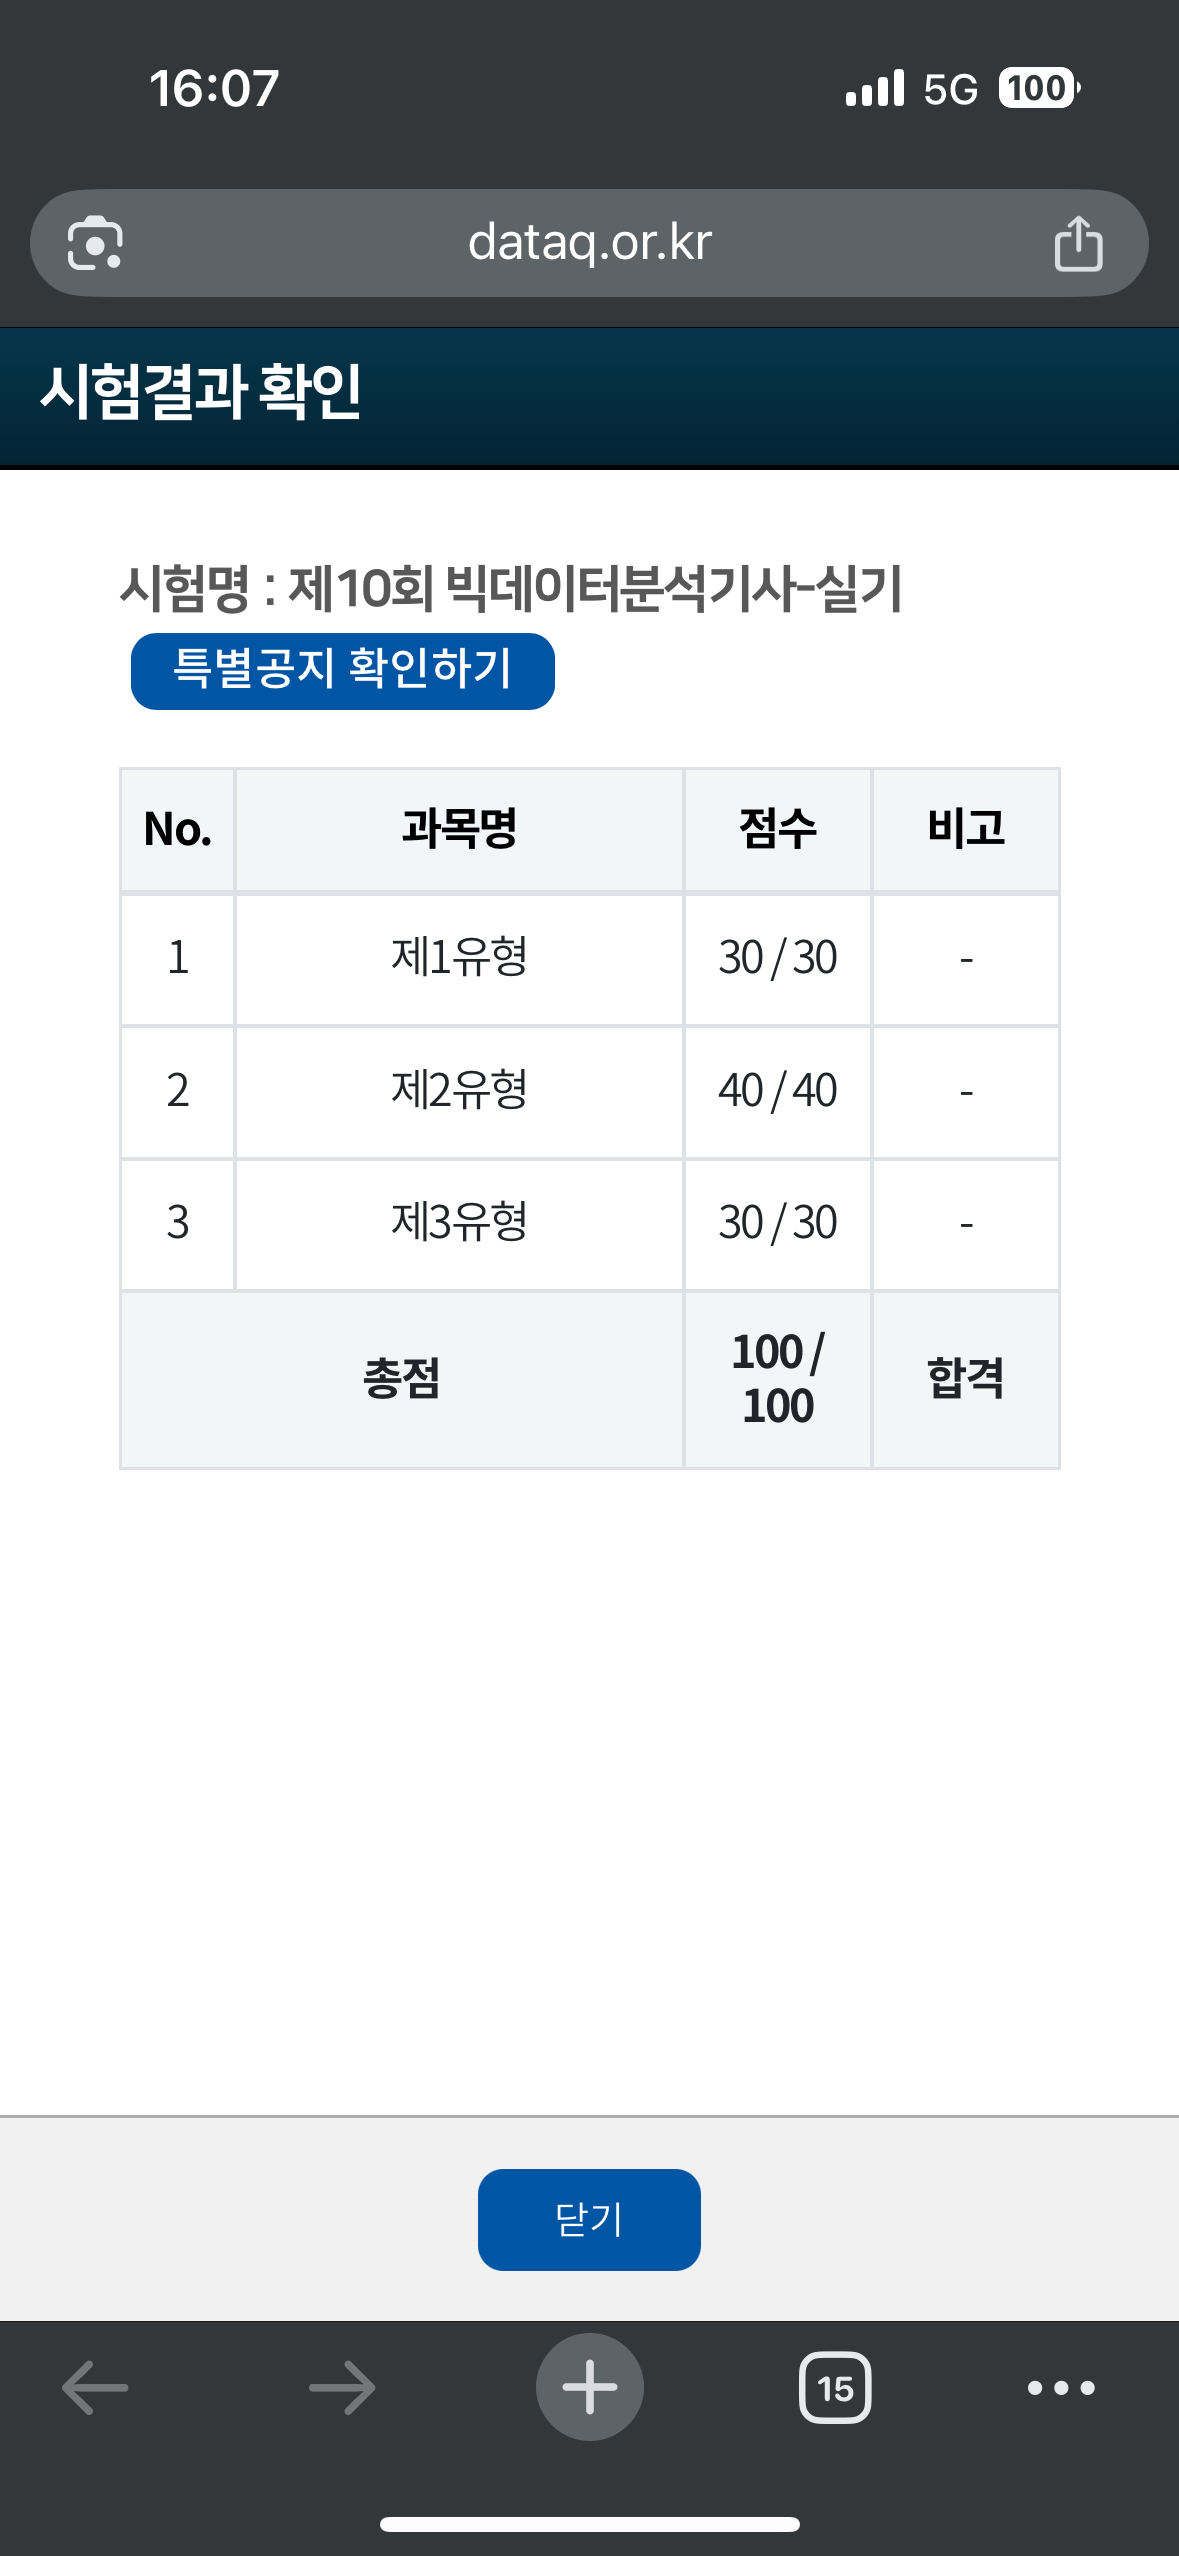

In [4]:
# 시험결과

from IPython.display import Image, display
img_path = '/content/drive/MyDrive/bigdata_result_songhyun.png'
display(Image(filename=img_path, width=400))

## **통계적 검정 개요**
## 차이 관련 검정
- **평균의 차이**
  - 비교대상 모집단 1개 :
    - 모분산을 안다 -> (z) 1표본 z검정
    - 모분산을 모른다 (t) 1표본 t검정 (ttest_1samp)
      - wilcoxon 검정 (정규성불만족시 비모수적 검정)

  - 비교대상 모집단 2개 :
    - 모분산을 안다 -> (z) 2표본 z검정
    - 모분산을 모른다 -> (t) 2표본 t검정 (ttest_ind)
      - 독립표본 t검정 (ex. 남/녀간 평균차이)
        - mannwhitney-u검정 (정규성불만족시 비모수적 검정)
      - 대응표본 t검정 (ex. 1개월뒤, 2개월뒤 반복 측정 case) (ttest_rel)

  - 비교대상 모집단 3개 이상 :
    - ANOVA 분산분석 (statsmodels.stats.anova)
      - 일원 분산분석 (One-way ANOVA) (ex. 한국, 미국, 독일의 평균 키 차이)
        - 반복측정 분산분석 (Repeated Measures ANOVA) (1개월뒤, 2개월뒤 반복 측정 case)
      - 이원 분산분석 (Two-way ANOVA) (2개 독립변수가 종속변수에 미치는 영향과 상호작용을 동시에 분석할 때)
        - 이원 반복측정 분산분석 (Two-way Repeated Measures ANOVA)

- **분산(분포)의 차이**
  - F 검정 (분산 차이를 검정) (분포가 정규성을 만족할 경우를 전제)
  - Levene's test (정규성을 만족하지 않을 때도 사용 가능)
  - Bartlett

<br>

## 관계 관련 검정
- **범주형 확률 분포의 적합도 및 독립성**
  - chi-square(카이제곱) 검정 (기대분포와의 적합도) (chisquare)
  - chi2_contingency 검정 (독립성 검정, 2d) (chi2_contingency)

- **범주형 변수 간 관계 분석**
  - 교차분석 (범주형자료 A가 또 다른 범주형자료 B에 영향을 주는 지를 확인)
- **수치형 변수 간 관계 분석**
  - 상관분석(Correlation)
- **수치형 변수 간 종속관계(인과관계) 분석**
  - 회귀분석(Regression)
    - 독립변수 : 종속변수 관계가 1:1 -> 단순회귀분석
    - 독립변수 : 종속변수 관게가 N:1 -> 다중회귀분석
    - 로지스틱회귀분석 (분류) (statsmodels.formula.api.logit)
      - odds ratio분석 (np.exp(md.params)

In [ ]:
import numpy as np
import pandas as pd
import os

# shapiro : 정규성 검정  (H0:정규성 만족 가정)
# levene : 등분산성 검정  (H0: 등분산성 만족 가정)

from scipy.stats import ttest_1samp, shapiro, wilcoxon
from scipy.stats import ttest_rel
from scipy.stats import ttest_ind, shapiro, levene, mannwhitneyu

from scipy.stats import f_oneway
from statsmodels.stats.anova import anova_lm # 일원분산분석
from statsmodels.formula.api import logit, ols

from scipy.stats import f
from scipy.stats import chisquare # 기대분포와 적합도 검정
from scipy.stats import chi2_contingency, pearsonr # (두 범주형변수의) 독립성 검정

from sklearn.preprocessing import MinMaxScaler, StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

from datetime import datetime

In [ ]:
import sklearn
print(dir(sklearn))

['calibration', 'clone', 'cluster', 'compose', 'config_context', 'covariance', 'cross_decomposition', 'datasets', 'decomposition', 'discriminant_analysis', 'dummy', 'ensemble', 'exceptions', 'experimental', 'externals', 'feature_extraction', 'feature_selection', 'frozen', 'gaussian_process', 'get_config', 'impute', 'inspection', 'isotonic', 'kernel_approximation', 'kernel_ridge', 'linear_model', 'manifold', 'metrics', 'mixture', 'model_selection', 'multiclass', 'multioutput', 'naive_bayes', 'neighbors', 'neural_network', 'pipeline', 'preprocessing', 'random_projection', 'semi_supervised', 'set_config', 'show_versions', 'svm', 'tree']


In [ ]:
#import pandas
#print(help(pandas.get_dummies))

In [ ]:
# 기본 (pandas numpy scipy)
import pandas as pd
import numpy as np
from scipy.stats import trim_mean

arr = np.array([1,2,4,6,10,100])

print(np.mean(arr))
print(np.min(arr))
print(np.max(arr))
print(np.std(arr),"\n")

#  NaN(Not a Number)을 무시하고 평균을 계산 (대상 데이터에 NaN 값이 포함되어 있어도 평균출력)
arr_nan = np.array([1,2,4,6,10,100, np.nan])

print(np.mean(arr_nan))
print(np.nanmean(arr_nan),"\n")

# 양극단 제거 후 평균 계산. e.g. proportiontocut=0.1이면 데이터 양쪽에서 10%씩 잘라냄
pro = 0.2
print(np.mean(arr))
print(trim_mean(arr, proportiontocut=pro))

20.5
1
100
35.67328599012619 

nan
20.5 

20.5
5.5


In [ ]:
from scipy.stats import trim_mean
print(trim_mean([1,2,3,4,5,6,7,8,1000], proportiontocut=0.2))

5.0


In [ ]:
# 기출 1유형

df = pd.DataFrame({'a' : [1,2,4,6,10,np.nan,100],
                   'b' : [2,5,6,7,11,np.nan,111]})
# dropna
df = df.dropna(axis=0)

# to sclice 70% of data
print(len(df)*0.7, int(len(df)*0.7))
df70 = df.iloc[:int(len(df)*0.7)]
print(df70)

# 1q value of column 'b'
print(df70['b'].quantile(0.25))

4.199999999999999 4
     a    b
0  1.0  2.0
1  2.0  5.0
2  4.0  6.0
3  6.0  7.0
4.25


In [ ]:
# random sampling
df = pd.DataFrame({'a' : [1,2,4,6,10,100]})
#np.random.seed(10) # seed 고정시
s = np.random.choice(df['a'], size=3, replace=False) # 비복원(replace=False) 추출
print(s)

[ 10   4 100]


In [ ]:
# date

from datetime import datetime
a1 = datetime.strptime("1919 March 1", "%Y %B %d")
a2 = datetime.strptime("3-1 1919", "%m-%d %Y")
a3 = datetime.strptime("1919-03-01", "%Y-%m-%d")
print(a1)
print(a2)
print(a3)
print("\n")

today= datetime.today()
f_today = datetime.strftime(today, "%Y%m%d")
print(f_today)

1919-03-01 00:00:00
1919-03-01 00:00:00
1919-03-01 00:00:00


20250620


In [ ]:
# 기출 1유형

data = pd.read_csv('drive/MyDrive/data6-1-1.csv')
data.head()

,소방서,출동시간,도착시간
0,소방서1,2023-09-16 06:12:29,2023-09-16 07:51:55
1,소방서5,2023-09-19 06:11:41,2023-09-19 08:08:36
2,소방서1,2023-09-14 06:12:00,2023-09-14 07:24:21
3,소방서6,2023-09-20 06:12:24,2023-09-20 06:30:45
4,소방서9,2023-09-15 06:11:50,2023-09-15 06:44:00


In [ ]:
from datetime import datetime

data['도착t'] = pd.to_datetime(data['도착시간'])
data['출동t'] = pd.to_datetime(data['출동시간'])

# time-interval in seconds (to minutes)
data['Min'] = (data['도착t'] - data['출동t']).apply(lambda x : x.total_seconds()/60)

data = data.sort_values(by='Min', ascending=False)

# 소방서별 출동소요시간 평균
gr_min = data.groupby('소방서')['Min'].mean().sort_values(ascending=False)

print(gr_min)
print(gr_min.idxmax())
print(gr_min.idxmin())

소방서
소방서9     80.658889
소방서5     61.250000
소방서2     60.228571
소방서7     56.670370
소방서1     54.952381
소방서4     49.136667
소방서3     43.490741
소방서8     42.693750
소방서10    42.365000
소방서6     41.764583
Name: Min, dtype: float64
소방서9
소방서6


In [ ]:
# np.bincount
x = np.array([2,1,1,10,1])
xlist = x.tolist()

print(np.bincount(x))
print(np.bincount(x).argmax())
#print(np.bincount(x).idxmax())

print(np.bincount(xlist))
print(np.bincount(xlist).argmax())

[0 3 1 0 0 0 0 0 0 0 1]
1
[0 3 1 0 0 0 0 0 0 0 1]
1


In [ ]:
# rank
x = np.array([1,1,5,5,7,9])
df = pd.DataFrame()

df['rank_min'] = pd.Series(x).rank(method='min')
df['rank_first'] = pd.Series(x).rank(method='first')
df['rank_dense'] = pd.Series(x).rank(method='dense')
df['rank_avg'] = pd.Series(x).rank(method='average')

df

,rank_min,rank_first,rank_dense,rank_avg
0,1.0,1.0,1.0,1.5
1,1.0,2.0,1.0,1.5
2,3.0,3.0,2.0,3.5
3,3.0,4.0,2.0,3.5
4,5.0,5.0,3.0,5.0
5,6.0,6.0,4.0,6.0


In [ ]:
# categorize w/ list comprehension

from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

df['cat2'] = ["L" if x > 5.5 else "S" for x in df['sepal length (cm)']]
df['cat3'] = ["L" if x > 6 else ("S" if x <= 5 else "M") for x in df['sepal length (cm)']]
df['cat4'] = ["L" if x > 6 else ("S" if x <= 5 else ("LM" if x > 5.5 else "SM")) for x in df['sepal length (cm)']]

print(df[['sepal length (cm)','cat2','cat3','cat4']].head(20))

    sepal length (cm) cat2 cat3 cat4
0                 5.1    S    M   SM
1                 4.9    S    S    S
2                 4.7    S    S    S
3                 4.6    S    S    S
4                 5.0    S    S    S
5                 5.4    S    M   SM
6                 4.6    S    S    S
7                 5.0    S    S    S
8                 4.4    S    S    S
9                 4.9    S    S    S
10                5.4    S    M   SM
11                4.8    S    S    S
12                4.8    S    S    S
13                4.3    S    S    S
14                5.8    L    M   LM
15                5.7    L    M   LM
16                5.4    S    M   SM
17                5.1    S    M   SM
18                5.7    L    M   LM
19                5.1    S    M   SM


In [ ]:
# categorize w/ function and apply

def categorize(x) :
  if x > 6 :
    return "Long"
  elif x > 5 :
    return "Medium"
  else :
    return "Short"

df['cat3-1'] = df['sepal length (cm)'].apply(categorize)
print(df[['sepal length (cm)','cat2','cat3','cat3-1']].head(10))
print(df['cat3'].value_counts())
print(df['cat3-1'].value_counts())

   sepal length (cm) cat2 cat3  cat3-1
0                5.1    S    M  Medium
1                4.9    S    S   Short
2                4.7    S    S   Short
3                4.6    S    S   Short
4                5.0    S    S   Short
5                5.4    S    M  Medium
6                4.6    S    S   Short
7                5.0    S    S   Short
8                4.4    S    S   Short
9                4.9    S    S   Short
cat3
L    61
M    57
S    32
Name: count, dtype: int64
cat3-1
Long      61
Medium    57
Short     32
Name: count, dtype: int64


In [ ]:
# rename columns
df_rn = df.rename(columns={'cat3-1' : 'cat3-a'})
print(df_rn.columns.tolist())

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'cat2', 'cat3', 'cat4', 'cat3-a']


In [ ]:
# null check

print(df_rn.isnull().sum())
print(df_rn.isnull().sum().sum())

df_rn['na'] = np.nan
df_rn['na'] = df_rn['na'].fillna(df['sepal length (cm)'].mean())

print(df_rn.head())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
cat2                 0
cat3                 0
cat4                 0
cat3-a               0
dtype: int64
0
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  cat2 cat3 cat4  cat3-a        na  
0    S    M   SM  Medium  5.843333  
1    S    S    S   Short  5.843333  
2    S    S    S   Short  5.843333  
3    S    S    S   Short  5.843333  
4    S    S    S   Short  5.843333  


In [ ]:
# merge, concat

df_l = pd.DataFrame({'name':['a','a','b','c'], 'math':[0,1,2,3]})
df_r = pd.DataFrame({'name':['c','b','b','d'], 'english':[4,5,6,7]})

df_merge = pd.merge(df_l, df_r, left_on='name', right_on='name', how='inner')
df_concat = pd.concat([df_l,df_r], axis=0)

print(df_merge)
print(df_concat)

  name  math  english
0    b     2        5
1    b     2        6
2    c     3        4
  name  math  english
0    a   0.0      NaN
1    a   1.0      NaN
2    b   2.0      NaN
3    c   3.0      NaN
0    c   NaN      4.0
1    b   NaN      5.0
2    b   NaN      6.0
3    d   NaN      7.0


### 이상치 제어
1. z-score (X-Mu / std) < 3  기반
2. 1.5*iqr 기반

In [ ]:
# outliers handling 이상치 제거
# 1) z-score (normal dist.기반) :abs(X-Mu/std)<3

df = pd.DataFrame({'score' : [1,1,1,1,1,1,1,1,2,5,10,100,1000,10000],
                   'name' : ['A','B','C','D','E','F','G','H','I','J','K','L','M','N']})

def esd(x) :
  return abs(x-x.mean()/x.std()) < 3

print("x.mean() :", x.mean(), "\n")
print(df.loc[esd(df.score)], "\n")
print(esd(df.score))

x.mean() : 4.666666666666667 

   score name
0      1    A
1      1    B
2      1    C
3      1    D
4      1    E
5      1    F
6      1    G
7      1    H
8      2    I 

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9     False
10    False
11    False
12    False
13    False
Name: score, dtype: bool


In [ ]:
# outliers handling 이상치 제거
# 2) iqr based (x < q1-1.5iqr or x > q3+1.5iqr) (iqr=q3-q1)

df = pd.DataFrame({'score' : [1,1,1,1,1,1,1,1,2,5,10,100,1000,10000],
                   'name' : ['A','B','C','D','E','F','G','H','I','J','K','L','M','N']})

q1 = np.quantile(df.score, q=0.25)
q2 = np.quantile(df.score, q=0.50)
q3 = np.quantile(df.score, q=0.75)

iqr = q3 - q1

df1 = df.loc[((df.score >= q1-1.5*iqr) & (df.score <= q3+1.5*iqr))]

print("quantiles : ", q1,q2,q3)
print("iqr : ", iqr)
print(df1)

quantiles :  1.0 1.0 8.75
iqr :  7.75
    score name
0       1    A
1       1    B
2       1    C
3       1    D
4       1    E
5       1    F
6       1    G
7       1    H
8       2    I
9       5    J
10     10    K


### 정규화
- MinMaxScaler (x-min / max-min)
- 이상치에 민감
- 거리기반 모델(KNN, SVM)에 적절

In [ ]:
# min-max scaling 최대최소 정규화
# formular : (x - min) / (max - min)

from sklearn.preprocessing import MinMaxScaler

data = np.array([1,3,5,10,15,35,70,150,350,480,900,1200,1800,5000])
data_reshape = data.reshape(-1,1)

scaled = MinMaxScaler().fit_transform(data_reshape)
print(scaled)

[[0.00000000e+00]
 [4.00080016e-04]
 [8.00160032e-04]
 [1.80036007e-03]
 [2.80056011e-03]
 [6.80136027e-03]
 [1.38027606e-02]
 [2.98059612e-02]
 [6.98139628e-02]
 [9.58191638e-02]
 [1.79835967e-01]
 [2.39847970e-01]
 [3.59871974e-01]
 [1.00000000e+00]]


### 표준화

In [ ]:
# standardize 표준화 (1) 수기로
# formular : (x - np.mean) / np.std

data = np.array([1,3,5,10,15,35,70,150,350,480,900,1200,1800,5000])

def standardize(a) :
  return (a-np.mean(a)) / np.std(a)

data_z = standardize(data)
print(data_z)
print(np.mean(data_z))

[-0.54923963 -0.54770253 -0.54616543 -0.54232267 -0.53847992 -0.52310889
 -0.4962096  -0.4347255  -0.28101526 -0.1811036   0.14168791  0.37225327
  0.83338399  3.29274787]
0.0


In [ ]:
# standardize 표준화 (2) sklearn.StandardScaler 사용해서

from sklearn.preprocessing import StandardScaler

data = np.array([1,3,5,10,15,35,70,150,350,480,900,1200,1800,5000])

data_reshape = data.reshape(-1,1)
data_z = StandardScaler().fit_transform(data_reshape)
print(data_z.flatten()) # flatten
print(np.mean(data_z))

[-0.54923963 -0.54770253 -0.54616543 -0.54232267 -0.53847992 -0.52310889
 -0.4962096  -0.4347255  -0.28101526 -0.1811036   0.14168791  0.37225327
  0.83338399  3.29274787]
0.0


In [ ]:
# pd.pivot_table (df의 컬럼들을 index, column, agg values으로 재구성)
# pd.pivot_table(data=df, index=, columns=, values=, aggfunc=)

df = pd.DataFrame({'score' : [10,0,0,10,100,50,50,10,10,100,50,50],
                   'name' : ['A','B','C','D','E','F','G','H','I','J','K','L'],
                   'dept' : ['X','Y','Z','Z','Y','Y','X','Z','Y','Z','Y','X']})

df_pivot = pd.pivot_table(data=df,index='dept', columns='name',values='score',aggfunc='sum')
print(df_pivot)

name     A    B    C     D      E     F     G     H     I      J     K     L
dept                                                                        
X     10.0  NaN  NaN   NaN    NaN   NaN  50.0   NaN   NaN    NaN   NaN  50.0
Y      NaN  0.0  NaN   NaN  100.0  50.0   NaN   NaN  10.0    NaN  50.0   NaN
Z      NaN  NaN  0.0  10.0    NaN   NaN   NaN  10.0   NaN  100.0   NaN   NaN


In [ ]:
# unstack (멀티인덱스를 인덱스-컬럼으로 재구성)
# 추가적으로 필요시 transpose()

df = pd.DataFrame({'score' : [10,0,0,10,100,50,50,10,10,100,50,50],
                   'name' : ['A','B','C','D','E','F','G','H','I','J','K','L'],
                   'dept' : ['X','Y','Z','Z','Y','Y','X','Z','Y','Z','Y','X']})

df = df.set_index(['name','dept'])

df_u = df.unstack()
df_ut = df_u.transpose()

print(df, "\n")
print(df_u, "\n", df_ut)

           score
name dept       
A    X        10
B    Y         0
C    Z         0
D    Z        10
E    Y       100
F    Y        50
G    X        50
H    Z        10
I    Y        10
J    Z       100
K    Y        50
L    X        50 

     score              
dept     X      Y      Z
name                    
A     10.0    NaN    NaN
B      NaN    0.0    NaN
C      NaN    NaN    0.0
D      NaN    NaN   10.0
E      NaN  100.0    NaN
F      NaN   50.0    NaN
G     50.0    NaN    NaN
H      NaN    NaN   10.0
I      NaN   10.0    NaN
J      NaN    NaN  100.0
K      NaN   50.0    NaN
L     50.0    NaN    NaN 
 name           A    B    C     D      E     F     G     H     I      J     K  \
      dept                                                                     
score X     10.0  NaN  NaN   NaN    NaN   NaN  50.0   NaN   NaN    NaN   NaN   
      Y      NaN  0.0  NaN   NaN  100.0  50.0   NaN   NaN  10.0    NaN  50.0   
      Z      NaN  NaN  0.0  10.0    NaN   NaN   NaN  10.0   NaN

### scipy statistics-test

In [ ]:
### scipy 통계검정

## 연속형변수 평균차이 검정 (1표본, 2표본, 다표본)
# 1표본
from scipy.stats import norm # 정규분포에서 누적분포함수값 / norm.cdf(z) / 모집단분산을 알고있을 경우 z검정, 그렇지않은 경우 t검정
from scipy.stats import shapiro, ttest_1samp, wilcoxon # 정규성(shapiro H0:정규성만족), H0기각시 wilcoxon
from scipy.stats import shapiro, ttest_rel # 쌍체표본 검정 (처치 전후 비교)

# 2표본
from scipy.stats import shapiro, ttest_ind, levene, mannwhitneyu # shapiro(정규성) 및 levene(등분산성)확인, 정규성기각시 mannwhitney-u검정

# 3개이상 다표본
from statsmodels.stats.anova import anova_lm # 일원분산분석

## 범주형변수 집단
# 분산(분포)차이 검정
from scipy.stats import f, levene, bartlett

# 적합도검정 (1d)
from scipy.stats import chisquare

# 독립성검정 (2d)
from scipy.stats import chi2_contingency

(참고) <br>
일원 분산분석 (One-way ANOVA)
- 한 가지 요인이 3개 이상 집단 간 평균에 영향을 미치는지를 검정할 때 사용
- 예: 광고 유형(TV/온라인/인쇄)에 따라 매출 평균이 다른가?

이원 분산분석 (Two-way ANOVA)
- 두 가지 요인의 주효과 및 상호작용 효과까지 검정할 때 사용
- 예: 광고 유형과 성별이 매출 평균에 미치는 영향 및 상호작용까지 확인

### 1표본
- z-score와 다르게 z검정에서의 z통계량 공식은 (Samp_mean-mu) / (sigma / N**0.5)
- p_value = 2* (1-norm(cdf(z))

In [ ]:
# z검정

from scipy.stats import norm

df = pd.DataFrame({'nums' : [12,14,16,19,11,17,13,5,6,2,4,25,27,29,24]})

samp = df['nums']
mu = 11 # 모평균
sigma = 3

# z통계량 공식 : (X-mu) / sigma.N**0.5
z = (np.mean(samp)-mu) / (sigma/np.sqrt(len(samp)))
p_value = 2*(1-norm.cdf(z)) # 양측검정

print(z, p_value)

5.0779114983608356 3.8160636495199185e-07


In [ ]:
# 1-samp t 검정
# c.f) shapiro -> H0:정규성 만족
# ttest_1samp(df['a'], popmean=10 , alternative='two-sided')
# wilcoxon(df['a']-10, alternative='two-sided')

from scipy.stats import shapiro, ttest_1samp, wilcoxon # 정규성(shapiro H0:정규성만족), H0기각시 wilcoxon

df = pd.DataFrame({'nums' : [12,14,16,19,11,17,13,5,6,2,4,25,27,29,24]})
df_w = pd.DataFrame({'nums' : [1012,140,16000,19,11,17,103,5,6,2,4,2580,27,29100,24]})

print("1) ttest_1samp (정규성만족)")
print(shapiro(df['nums']))
res1 = ttest_1samp(df['nums'], popmean=10, alternative='two-sided') # 양측검정
print(res1)

print("2) wilcoxon (정규성불만족)")
print(shapiro(df_w['nums']))
res2 = wilcoxon(df_w['nums']-10, alternative='greater') # 단측검정
print(res2)

1) ttest_1samp (정규성만족)
ShapiroResult(statistic=np.float64(0.9532919654462546), pvalue=np.float64(0.5777056636287256))
TtestResult(statistic=np.float64(2.213715642776272), pvalue=np.float64(0.043954652352968596), df=np.int64(14))
2) wilcoxon (정규성불만족)
ShapiroResult(statistic=np.float64(0.47006491861749355), pvalue=np.float64(2.0362270620122098e-06))
WilcoxonResult(statistic=np.float64(105.0), pvalue=np.float64(0.004180908203125))


In [ ]:
# relative ttest (대응표본 t 검정)
# ttest_rel(after, before, alternative=, )

from scipy.stats import shapiro, ttest_rel # 쌍체표본 검정 (처치 전후 비교)

data = pd.DataFrame({'before' : [5,3,8,4,3,2,1],
                     'after' : [8,6,6,5,8,7,3]})

res = ttest_rel(data['after'], data['before'], alternative='greater') # 단측검정(after가 더 커졌는지)
print(res)

TtestResult(statistic=np.float64(2.633628675421043), pvalue=np.float64(0.019435182851729293), df=np.int64(6))


### 2표본
- shapiro -> levene -> main test

In [ ]:
from scipy.stats import shapiro, ttest_ind, levene, mannwhitneyu
# shapiro(정규성) 및 levene(등분산성)확인, 정규성기각시 mannwhitney-u검정
# ttest_ind(x1, x2, alternative=, equal_var=False)

N1, N2 = 150,200 # 난수 갯수
mu1, mu2 = 1, 1.5 # 평균
sigma1,sigma2 = 1.1,1.3 # 표준편차

np.random.seed(0)

x1 = norm(mu1,sigma1).rvs(N1)
x2 = norm(mu2,sigma2).rvs(N2)

print(shapiro(x1))
print(shapiro(x2), "\n")
print(levene(x1,x2), "\n")
print(ttest_ind(x1, x2, alternative="less", equal_var=True))

ShapiroResult(statistic=np.float64(0.9897557910313672), pvalue=np.float64(0.3452747477455558))
ShapiroResult(statistic=np.float64(0.9942986127081611), pvalue=np.float64(0.645203172262183)) 

LeveneResult(statistic=np.float64(1.0365906859191036), pvalue=np.float64(0.3093230091801344)) 

TtestResult(statistic=np.float64(-1.767304296624003), pvalue=np.float64(0.0390268259416626), df=np.float64(348.0))


- x1,x2 모두 정규성 만족
- x1&x2 등분산성 만족(귀무가설채택) (equal_var=True)
- 독립표본t검정 결과 귀무가설기각 (통계적으로 x1집단이 x2집단보다 평균이 작다)

### 3표본

In [ ]:
# ONE-Way ANOVA 일원분산분석

group_A = [10, 12, 11, 13]
group_B = [8, 9, 10, 7]
group_C = [14, 13, 15, 14]

print(shapiro(group_A))
print(shapiro(group_B))
print(shapiro(group_C))

print(levene(group_A, group_B, group_C), "\n")
stat, pvalue = f_oneway(group_A, group_B, group_C)
print(stat, pvalue)

ShapiroResult(statistic=np.float64(0.9929120069984326), pvalue=np.float64(0.9718770585603881))
ShapiroResult(statistic=np.float64(0.9929120069984326), pvalue=np.float64(0.9718770585603881))
ShapiroResult(statistic=np.float64(0.9446643968314482), pvalue=np.float64(0.6829615282579))
LeveneResult(statistic=np.float64(1.0), pvalue=np.float64(0.4053444297059028)) 

22.74999999999997 0.0003022087484017767


### F-test
- whether variances of two groups are statistically significantly different each otehr.

In [ ]:
from scipy.stats import f

group1 = np.random.normal(10, 2.5, 1000)
group2 = np.random.normal(10, 2.2, 1000)

print(shapiro(group1))
print(shapiro(group2)) # 0.74, 1.11 each, so that we can say shapiro H0 accepted (normal distributed)

var1 = np.var(group1, ddof=1)
var2 = np.var(group2, ddof=1)
print(f"var1 : {var1:.3f} \nvar2 : {var2:.3f}")

F = max(var1,var2) / min(var1,var2)

df1 = len(group1)-1
df2 = len(group2)-1

pvalue = 2 * min(f.cdf(F, df1, df2), 1-f.cdf(F, df1, df2))
print(df1, df2)
print(f"p_value : {pvalue:.6f}")

ShapiroResult(statistic=np.float64(0.9992508534999845), pvalue=np.float64(0.96832485409357))
ShapiroResult(statistic=np.float64(0.9987860813015593), pvalue=np.float64(0.7458288749645481))
var1 : 5.876 
var2 : 4.653
999 999
p_value : 0.000229


### 범주형 data
- chisquare, chi2_contingency,

In [ ]:
# 유형3 기출

df = pd.DataFrame({'effect' : [4,4,3,4,1,4,1,4,1,4,4,2,1,4,2,3,2,4,4,4]})
print(df.head())

   effect
0       4
1       4
2       3
3       4
4       1


In [ ]:
# 4 : 이상 없음
# 이상 없음의 비율 구하기

le = len(df)
ob = len(df[df['effect'] == 4])

print(ob/le)

0.55


In [ ]:
# 예상부작용 비율과 부작용관찰값이 통계적으로 유의하게 차이가 있는지 카이제곱검정

exp_ratio = [0.1,0.05,0.15,0.7]
sum_cnt = df['effect'].count()
exp_cnt = []
for i in range(4) :
  cnt = int(exp_ratio[i] * sum_cnt)
  exp_cnt.append(cnt)
print(exp_cnt)


[2, 1, 3, 14]


In [ ]:
obs_cnt = df.value_counts().sort_index()

from scipy.stats import chisquare
print(chisquare(f_obs=obs_cnt, f_exp=exp_cnt))

Power_divergenceResult(statistic=np.float64(6.976190476190476), pvalue=np.float64(0.07266054733847573))


In [ ]:
# categorical data

# goodness-of-fit test (chisquare), independence test(chi2_contingency)
# H0: 관찰빈도(f_obs)와 기대빈도(f_exp) 간에 차이가 없다

from scipy.stats import chisquare

num = np.array([355,801,520])
exp = np.array([0.22,0.44,0.34])*np.sum(num)

res = chisquare(num, f_exp=exp)
print(res)

Power_divergenceResult(statistic=np.float64(10.347922223782113), pvalue=np.float64(0.00566209614384885))


In [ ]:
# independence test (chi2_contingency)

from scipy.stats import chi2_contingency
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

df['cat_len'] = ["L" if x>6 else ("S" if x<=5 else "M") for x in df['sepal length (cm)']]
df['cat_wid'] = ["W" if x>3 else "N" for x in df['sepal width (cm)']]

# crosstab form으로 chi2 test에 직접 대입할 수 있음.
crtb = pd.crosstab(df['cat_len'], df['cat_wid'])
print(crtb, "\n")

res = chi2_contingency(crtb)
print(res)

cat_wid   N   W
cat_len        
L        38  23
M        33  24
S        12  20 

Chi2ContingencyResult(statistic=np.float64(5.465091147689933), pvalue=np.float64(0.06505348027971855), dof=2, expected_freq=array([[33.75333333, 27.24666667],
       [31.54      , 25.46      ],
       [17.70666667, 14.29333333]]))


In [ ]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df_diabetes = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df_diabetes['target'] = diabetes.target

corr = df_diabetes.corr()
print(corr)

             age       sex       bmi        bp        s1        s2        s3  \
age     1.000000  0.173737  0.185085  0.335428  0.260061  0.219243 -0.075181   
sex     0.173737  1.000000  0.088161  0.241010  0.035277  0.142637 -0.379090   
bmi     0.185085  0.088161  1.000000  0.395411  0.249777  0.261170 -0.366811   
bp      0.335428  0.241010  0.395411  1.000000  0.242464  0.185548 -0.178762   
s1      0.260061  0.035277  0.249777  0.242464  1.000000  0.896663  0.051519   
s2      0.219243  0.142637  0.261170  0.185548  0.896663  1.000000 -0.196455   
s3     -0.075181 -0.379090 -0.366811 -0.178762  0.051519 -0.196455  1.000000   
s4      0.203841  0.332115  0.413807  0.257650  0.542207  0.659817 -0.738493   
s5      0.270774  0.149916  0.446157  0.393480  0.515503  0.318357 -0.398577   
s6      0.301731  0.208133  0.388680  0.390430  0.325717  0.290600 -0.273697   
target  0.187889  0.043062  0.586450  0.441482  0.212022  0.174054 -0.394789   

              s4        s5        s6   

In [ ]:
from scipy.stats import pearsonr
# pearsonr(df['a'], df['b'])

def pearson(df, comparelist, target) :
  for i in comparelist :
    x = df[i]
    y = df[target]

    result = pearsonr(x,y)
    print(f"{target} w/ {i} : {result}")

In [ ]:
print(pearson(df_diabetes, ['bmi','sex'], 'target'))

target w/ bmi : PearsonRResult(statistic=np.float64(0.5864501344746886), pvalue=np.float64(3.4660064451673014e-42))
target w/ sex : PearsonRResult(statistic=np.float64(0.04306199845160541), pvalue=np.float64(0.3664292946519808))
None


In [ ]:
from sklearn.datasets import load_wine
lw = load_wine()
df_lw = pd.DataFrame(data=lw.data, columns=lw.feature_names)
df_lw['target'] = lw.target
print(df_lw.head(3))

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   

   od280/od315_of_diluted_wines  proline  target  
0                          3.92   1065.0       0  
1                          3.40   1050.0       0  
2                          3.17   1185.0       0  


- RandomForest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df = df_diabetes.copy()

X = df.drop(columns=['target'])
y = df['target']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

#md = RandomForestRegressor(n_estimators=100, max_depth=4)
md = RandomForestRegressor(random_state=0)

md.fit(X_train, y_train)
y_pred = md.predict(X_test)

mse =  mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2_score = r2_score(y_test, y_pred)

print(mse)
print(rmse)
print(r2_score)

3750.300122471911
61.23969401027336
0.26865181564422547


- RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

df = df_lw.copy()

X = df.drop(columns='target')
y = df['target']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

md = RandomForestClassifier(random_state=0)
md.fit(X_train,y_train)

y_pred = md.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print(cm)
print(accuracy_score(y_test, y_pred))

[[14  0  0]
 [ 0 15  1]
 [ 0  0  6]]
0.9722222222222222


### (2 Class) Classifier w/ roc_auc_score evaluation

In [ ]:
df = df_lw.copy()
df = df[df.target != 2]
df.target.value_counts()

,count
target,
1,71
0,59


In [ ]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score

X = df.drop(columns='target')
y = df['target']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

md = RandomForestClassifier(random_state=0)
md.fit(X_train,y_train)

#y_pred = md.predict(X_test)
y_pred_proba = md.predict_proba(X_test)

#cm = confusion_matrix(y_test, y_pred_proba[:,1])
#print(cm)

roc_auc_score = roc_auc_score(y_test, y_pred_proba[:,1])
print(roc_auc_score)

1.0


In [ ]:
print(y_test)
print(y_pred_proba[:,1])

8      0
59     1
92     1
104    1
97     1
30     0
44     0
33     0
63     1
26     0
73     1
7      0
22     0
105    1
10     0
48     0
125    1
90     1
2      0
93     1
52     0
96     1
24     0
51     0
50     0
40     0
Name: target, dtype: int64
[0.   0.99 1.   0.97 0.95 0.05 0.15 0.03 0.97 0.06 0.36 0.   0.1  0.99
 0.03 0.02 0.98 1.   0.03 0.96 0.01 0.96 0.25 0.07 0.22 0.02]


In [ ]:
print(y_test.tolist())
print(y_pred.tolist())

[0, 1, 0, 1, 0, 2, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 0, 0, 2, 1, 0, 0, 1, 0, 0, 1, 2, 2, 2, 1, 2, 2]
[0, 1, 0, 1, 0, 2, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 0, 0, 2, 1, 0, 0, 1, 0, 0, 1, 2, 2, 2, 1, 2, 2]


In [ ]:
y_predscore = md.predict_proba(X_test)
print(y_predscore[:5])
print(np.argmax(y_predscore, axis=1))
print(np.max(y_predscore, axis=1))

[[0.94 0.05 0.01]
 [0.01 0.97 0.02]
 [0.93 0.07 0.  ]
 [0.   1.   0.  ]
 [1.   0.   0.  ]]
[0 1 0 1 0 2 1 0 1 2 1 1 1 1 1 1 1 0 2 2 0 0 2 1 0 0 1 0 0 1 2 2 2 1 2 2]
[0.94 0.97 0.93 1.   1.   0.91 0.98 0.96 1.   0.99 0.92 1.   0.98 0.92
 0.98 0.98 0.85 0.98 0.97 0.74 0.61 0.96 0.9  0.98 0.98 0.98 0.99 0.91
 0.97 0.64 0.74 0.65 0.59 0.57 0.7  0.61]


- statsmodels.api regression and odds ratio

In [ ]:
from statsmodels.formula.api import ols, logit

#from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.columns = ['sepall','sepalw','petall','petalw','target']
print(df.columns.tolist())
print(df.head(), "\n")

formula = 'target~sepall+sepalw+petall+petalw'

md = ols(formula=formula, data=df).fit()
print(md.summary())

['sepall', 'sepalw', 'petall', 'petalw', 'target']
   sepall  sepalw  petall  petalw  target
0     5.1     3.5     1.4     0.2       0
1     4.9     3.0     1.4     0.2       0
2     4.7     3.2     1.3     0.2       0
3     4.6     3.1     1.5     0.2       0
4     5.0     3.6     1.4     0.2       0 

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     484.5
Date:                Thu, 19 Jun 2025   Prob (F-statistic):           8.46e-83
Time:                        01:01:42   Log-Likelihood:                 17.437
No. Observations:                 150   AIC:                            -24.87
Df Residuals:                     145   BIC:                            -9.821
Df Model:                           4                          

In [ ]:
df['target1'] = [1 if x>1 else 0 for x in df['target']]
df1 = df.drop(columns=['target'])

formula1 = 'target1~sepall+sepalw+petall+petalw'

md = logit(formula1, data=df1).fit()
print(md.summary())

Optimization terminated successfully.
         Current function value: 0.039662
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:                target1   No. Observations:                  150
Model:                          Logit   Df Residuals:                      145
Method:                           MLE   Df Model:                            4
Date:                Thu, 19 Jun 2025   Pseudo R-squ.:                  0.9377
Time:                        01:01:42   Log-Likelihood:                -5.9493
converged:                       True   LL-Null:                       -95.477
Covariance Type:            nonrobust   LLR p-value:                 1.189e-37
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -42.6378     25.708     -1.659      0.097     -93.024       7.748
sepall        -2.4652      2

In [ ]:
# 회귀계수 합계 구하기
print(sum(md.params))

-24.068388980509535


In [ ]:
# 변수별 오즈비
oddsr = np.exp(md.params)
print(oddsr)

print("\n")
# 특정변수 5배 증가할 때 오즈비
oddsr5_petalw = np.exp(md.params['petalw']*5)
print(oddsr5_petalw)

Intercept    3.038345e-19
sepall       8.499013e-02
sepalw       1.254665e-03
petall       1.244887e+04
petalw       8.741145e+07
dtype: float64


5.103189888228025e+39


In [ ]:
# 유형3 기출

df = pd.read_csv("drive/MyDrive/data6-3-2.csv")
df.head()

,solar,wind,o3,temperature
0,89.14,6.28,33.52,23.0
1,109.97,1.04,27.01,20.7
2,102.83,6.42,41.00,20.5
3,84.94,10.20,33.44,22.2
4,94.21,4.95,29.97,21.4


In [ ]:
# linear regression 구축하고 변수 o3의 회귀계수 구하기

from statsmodels.formula.api import ols

formula = 'temperature~solar+wind+o3'
md = ols(formula, data=df).fit()
print(md.summary())

                            OLS Regression Results                            
Dep. Variable:            temperature   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     1.464
Date:                Fri, 20 Jun 2025   Prob (F-statistic):              0.229
Time:                        08:37:39   Log-Likelihood:                -195.45
No. Observations:                 100   AIC:                             398.9
Df Residuals:                      96   BIC:                             409.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.0507      1.994      9.555      0.0

In [ ]:
print(md.params['o3'])

0.0749385437813658


In [ ]:
# wind 회귀계수의 pvalue

print(md.pvalues['wind'])

0.7797177202071661


In [ ]:
# 이 모델에서 solar : 100, wind : 5, o3: 30 일때 예측값

new_data = pd.DataFrame({'solar':[100],
                         'wind':[5],
                         'o3':[30]})
print(new_data)

   solar  wind  o3
0    100     5  30


In [ ]:
print(md.predict(new_data))

0    21.56163
dtype: float64


In [ ]:
df = pd.read_csv("drive/MyDrive/student_assessment.csv")
print(df.head())

   id_assessment  student_id  study_period_days  score
0            103           0                 22   87.0
1             93           1                 70   92.0
2             15           2                 22    2.0
3            107           3                 22   51.0
4             72           4                 22   73.0


In [ ]:
# dropna
print(df.isnull().sum().sum())
print(len(df))

df = df.dropna()
print(df.isnull().sum().sum())
print(len(df))

21
2565
0
2544


In [ ]:
print(df['id_assessment'].value_counts().sort_values(ascending=False))
print(df['id_assessment'].value_counts().idxmax())

id = df['id_assessment'].value_counts().idxmax()
print(id)

id_assessment
12     33
47     32
8      31
113    29
39     28
       ..
112    11
43     10
18     10
71      9
83      9
Name: count, Length: 133, dtype: int64
12
12


In [ ]:
df = df[df['id_assessment']==id]

# standard scaler
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
scaled = ss.fit_transform(df[['score']])
print(scaled)

[[ 0.31932835]
 [-0.36544075]
 [ 2.18342203]
 [ 0.28128563]
 [-0.32739802]
 [ 1.00409746]
 [ 0.09107199]
 [-0.78391076]
 [ 1.11822564]
 [-0.74586803]
 [ 1.00409746]
 [ 1.34648201]
 [-0.89803895]
 [ 1.30843929]
 [-1.12629531]
 [-1.05020986]
 [ 1.15626837]
 [-0.85999622]
 [-1.43063714]
 [-1.05020986]
 [-1.16433804]
 [ 1.04214019]
 [-1.20238077]
 [-1.27846623]
 [-1.46867987]
 [ 0.20520017]
 [-0.2893553 ]
 [ 0.58562745]
 [ 1.61278111]
 [ 0.73779836]
 [-0.09914166]
 [ 0.31932835]
 [-0.17522711]]


In [ ]:
print(scaled.max())

2.1834220325524965
